In [ ]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os
os.chdir("drive/My Drive/Ben_Boyd_MSc_Project/Data")


Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
def pit(prob_grid,z_grid_1D,real):
  real=real.reshape(len(real),1)
  gals=len(prob_grid)
  pit_val=np.zeros(gals)
  z_grid=np.repeat(z_grid_1D.reshape(1,len(z_grid_1D)),gals,axis=0)
  id_grid=np.repeat(np.arange(len(z_grid_1D)).reshape(1,len(z_grid_1D)),gals,axis=0)
  
  ids=id_grid[np.arange(len(z_grid)),np.argmin(np.absolute(z_grid-real),axis=1)]
  for i in range(gals):
    pit_val[i]=np.trapz(prob_grid[i,:ids[i]+1],z_grid_1D[:ids[i]+1])
    if i%1000==0:
      print(i)
      print(pit_val[i])
  return pit_val

def sig_bounds(x):
  x_sort=np.sort(x)
  return x_sort[int(0.159*len(x))-1], x_sort[int(0.841*len(x))-1]


def plot_func(fun,pred,real,ax=None,zlim=6,bins=20,color='blue',label=None):
  bin_edges=np.linspace(0,zlim,bins+1)
  vals=np.array([])
  down=np.array([])
  up=np.array([])
  for i in range(bins):
    logic= np.logical_and(real>bin_edges[i],real<bin_edges[i+1])
    vals=np.append(vals,fun(pred[logic],real[logic]))
    d,u=sig_bounds(pred[logic])
    down=np.append(down,d)
    up=np.append(up,u)
    

  width=bin_edges[1]-bin_edges[0]

  if ax==None:
    plot=plt.plot(-width*0.5+bin_edges[1:],vals,color=color,label=label+' Mean')
    plt.plot(-width*0.5+bin_edges[1:],down,color=color,linestyle='--',alpha=0.5,label=label+' $\sigma_{68}$')
    plt.plot(-width*0.5+bin_edges[1:],up,color=color,linestyle='--',alpha=0.5)
    plt.xlabel(r'True Redshift $z$',fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)


  else:
    plot=ax.plot(-width*0.5+bin_edges[1:],vals,color=color,label=label)
    ax.set_xlabel('Spectroscopic Redshift',fontsize=20)
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(18) 
  return plot


def sigma_nmad(pred,real):

  med=np.median(pred-real)

  return 1.48*np.median(np.absolute(pred-real-med)/(1+real))

def outlier_frac(pred,real):
  return len(pred[np.absolute((pred-real)/(1+real))>0.15])/len(pred)


def bias(pred,real):
  return np.median((pred-real)/(1+real))


def plot_pdf(z_range,pdf_arr,pred,ax,color='blue',label='',h=5):

  plot=ax.plot(z_range,pdf_arr,color=color,label=label+' PDF')
  ax.plot([pred,pred],[0,h],color=color,linestyle='--',label=label+' Prediction')

  return plot





In [ ]:
from astropy.table import Table
from astropy import table

n_input=54
x_data=0
y_data=0
cat0 = table.Table.read('COSMOS2020.fits',format='fits',hdu=1)
spec_cat=cat0[cat0['ZSPEC']!=-1]
n_samples=len(spec_cat)
x_spec=np.zeros((n_samples,n_input))
keys=spec_cat.keys()

y_spec=spec_cat['ZSPEC']
lp_pred=spec_cat['lp_zq']
count=0
for key_name in keys:
  if key_name[len(key_name)-4:]=='FLUX':
        
    filt=key_name[:len(key_name)-5]
    x_spec[:,count]=spec_cat[filt+'_FLUX']
    x_spec[:,count+1]=spec_cat[filt+'_FLUXERR']
    count+=2

spec_cat=0
cat0=0


x_spec=np.array(x_spec)
y_spec=np.array(y_spec)
y_spec=y_spec.reshape(len(y_spec),1)





mdn_pred=np.load('mdn_spec_pred.npy',allow_pickle=True)
mdn_pdf=np.load('mdn_spec_pdf.npy',allow_pickle=True)

nsf_pred=np.load('nsf_spec_pred.npy',allow_pickle=True)
nsf_pdf=np.load('nsf_spec_pdf.npy',allow_pickle=True)




z_range=np.linspace(0,6,1200)

spec=y_spec.reshape(len(y_spec),)

mdn_pred=mdn_pred[lp_pred>0]
nsf_pred=nsf_pred[lp_pred>0]
spec=spec[lp_pred>0]

mdn_pdf=mdn_pdf[lp_pred>0,:]
nsf_pdf=nsf_pdf[lp_pred>0,:]

lp_pred=lp_pred[lp_pred>0]


In [ ]:
mdn_pit=pit(mdn_pdf,z_range,spec)
nsf_pit=pit(nsf_pdf,z_range,spec)

0
0.7834083634264379
1000
0.23605940014258003
2000
0.1791151589247214
3000
0.45767753155367413
4000
0.8895041938343734
5000
0.49569773705042064
6000
0.9143965903869778
7000
0.11479815764707596
8000
0.9302177956396946
9000
0.21952912614082168
10000
0.9280044084924551
11000
0.9466059632885419
0
0.7492890126251299
1000
0.5353204212744709
2000
0.5478839178603016
3000
0.4197148983343487
4000
0.5038736384265666
5000
0.5063063469859115
6000
0.5763261013697708
7000
0.3029664901459592
8000
0.893160573358308
9000
0.47495129293108895
10000
0.8025757998501489
11000
0.7643916614525901


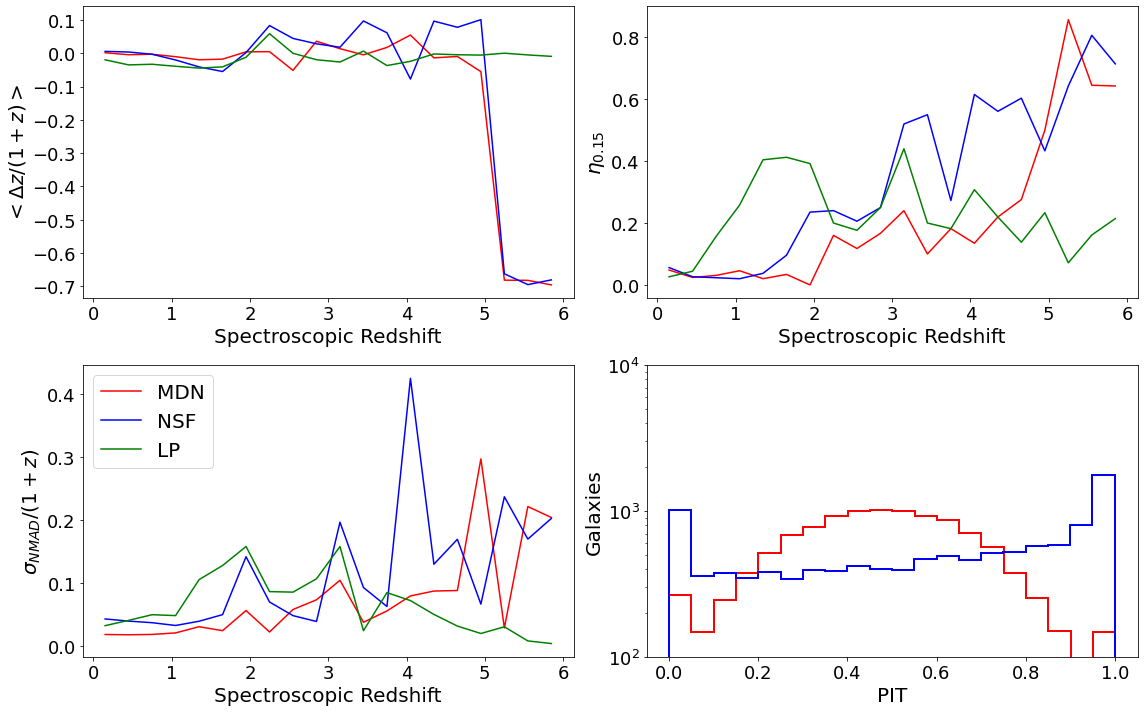

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(16,10))

plot=plot_func(bias,mdn_pred,spec,ax=axs[0,0],color='red',label='MDN')
plot=plot_func(bias,nsf_pred,spec,ax=axs[0,0],color='blue',label='NSF')
plot=plot_func(bias,lp_pred,spec,ax=axs[0,0],color='green',label='LP')

axs[0,0].set_ylabel(r'$<\Delta z /(1+z)>$',fontsize=20)


plot=plot_func(sigma_nmad,mdn_pred,spec,ax=axs[1,0],color='red',label='MDN')
plot=plot_func(sigma_nmad,nsf_pred,spec,ax=axs[1,0],color='blue',label='NSF')
plot=plot_func(sigma_nmad,lp_pred,spec,ax=axs[1,0],color='green',label='LP')

axs[1,0].set_ylabel(r'$\sigma_{NMAD}/(1+z)$',fontsize=20)
axs[1,0].legend(fontsize=20)


plot=plot_func(outlier_frac,mdn_pred,spec,ax=axs[0,1],color='red',label='MDN')
plot=plot_func(outlier_frac,nsf_pred,spec,ax=axs[0,1],color='blue',label='NSF')
plot=plot_func(outlier_frac,lp_pred,spec,ax=axs[0,1],color='green',label='LP')

axs[0,1].set_ylabel(r'$\eta_{0.15}$',fontsize=20)

axs[1,1].hist(nsf_pit,bins=20,color='red',histtype='step',linewidth=2)
axs[1,1].hist(mdn_pit,bins=20,color='blue',histtype='step',linewidth=2)
#axs[1,1].hist(nsf_pred,bins=20,color='red',histtype='step',linewidth=2)
axs[1,1].set_ylabel('Galaxies',fontsize=20)
axs[1,1].set_xlabel('PIT',fontsize=20)
axs[1,1].set_ylim(100,10000)
axs[1,1].set_yscale('log')

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
fig.tight_layout()
plt.show()

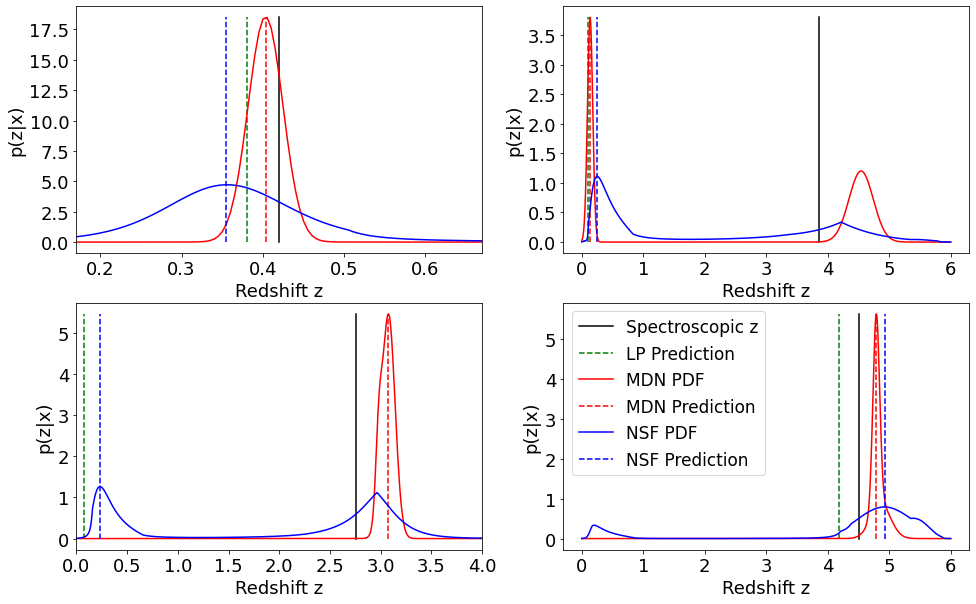

In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(16,10))



id=np.where(np.logical_and(spec>0,spec<1))[0][0]


h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[0,0].plot([spec[id],spec[id]],[0,h],color='black',label='Spectroscopic z')
axs[0,0].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[0,0],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[0,0],color='blue',label='NSF',h=h)

axs[0,0].set_xlim(np.max([0,spec[id]-0.25]),np.min([6,spec[id]+0.25]))

id=np.where(np.logical_and(spec>2,spec<3))[0][0]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[1,0].plot([spec[id],spec[id]],[0,h],color='black',label='Spectroscopic z')
axs[1,0].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[1,0],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[1,0],color='blue',label='NSF',h=h)
axs[1,0].set_xlim(0,4)

id=np.where(np.logical_and(spec>3,spec<4))[0][0]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[0,1].plot([spec[id],spec[id]],[0,h],color='black',label='Spectroscopic z')
axs[0,1].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[0,1],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[0,1],color='blue',label='NSF',h=h)


#axs[0,1].set_xlim(np.max([0,spec[id]-1]),np.min([6,spec[id]+1]))


id=np.where(np.logical_and(spec>4,spec<6))[0][0]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[1,1].plot([spec[id],spec[id]],[0,h],color='black',label='Spectroscopic z')
axs[1,1].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[1,1],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[1,1],color='blue',label='NSF',h=h)


axs[1,1].legend(fontsize=17)


for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 


axs[0,0].set_xlabel('Redshift z',fontsize=18)
axs[1,0].set_xlabel('Redshift z',fontsize=18)
axs[0,1].set_xlabel('Redshift z',fontsize=18)
axs[1,1].set_xlabel('Redshift z',fontsize=18)

axs[0,0].set_ylabel('p(z|x)',fontsize=18)
axs[1,0].set_ylabel('p(z|x)',fontsize=18)
axs[0,1].set_ylabel('p(z|x)',fontsize=18)
axs[1,1].set_ylabel('p(z|x)',fontsize=18)


plt.show()


In [ ]:

from astropy.table import Table
from astropy import table

n_samples =  1000000 # just use train everything in a batch
beta=True
small_range=False
magnitudes=False
a=0
if beta:
  a+=5

import numpy as onp
import warnings
warnings.filterwarnings("ignore")
cats=1

def mag_err(flux_err,flux):
    
    return 1.09*flux_err/flux

def mag(flux):
    x=-2.5*onp.log10(flux) + 23.9 
    x[onp.isnan(x)]=-2.5*onp.log10(-flux[onp.isnan(x)]) + 23.9 

    return x 
filter_names=onp.array([])
for c in range(cats):
    cat = table.Table.read('sim/mil'+str(c+21)+'_noisy_gal.fits',format='fits',hdu=1)
    if small_range:
      cat=cat[cat['redshift']<2]
    keys=cat.keys()
    count=0
    y_data=cat['redshift']
    x_data=onp.zeros((len(y_data),54))
    for key_name in keys:

        if key_name[len(key_name)-9:]=='BETA_FLUX':

                
            filt=key_name[:len(key_name)-10+a]
            filter_names=onp.append(filter_names,key_name[:len(key_name)-10])
            if magnitudes:

              x_data[:,count]=mag(cat[filt+'_FLUX'])
              x_data[:,count+1]=mag_err(cat[filt+'_FLUXERR'],cat[filt+'_FLUX'])
            else:
              x_data[:,count]=cat[filt+'_FLUX']
              x_data[:,count+1]=cat[filt+'_FLUXERR']
            
            count+=2
            
            
        
    print(c)


y_data=np.array(y_data)

0


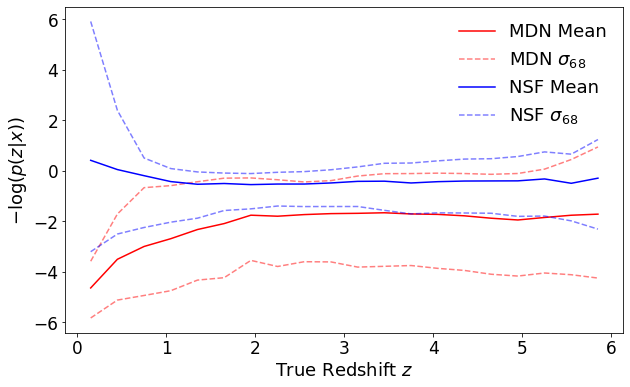

In [ ]:
def mean_loss(loss,x):
  return np.mean(loss)
nsf_loss=np.load('nsf_loss.npy',allow_pickle=True)
mdn_loss=np.load('mdn_loss.npy',allow_pickle=True)


plt.figure(figsize=(10,6))
plot_func(mean_loss,mdn_loss,y_data,color='red',label='MDN')


plot_func(mean_loss,nsf_loss,y_data,color='blue',label='NSF')

plt.ylabel(r'$-\log(p(z|x))$',fontsize=18)
plt.legend(fontsize=18,frameon=False)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()




In [ ]:
from astropy.table import Table
from astropy import table

n_input=54
x_data=0
y_data=0
cat0 = table.Table.read('COSMOS2020.fits',format='fits',hdu=1)
spec_cat=cat0[cat0['lp_zq']>0]
n_samples=len(spec_cat)
x_spec=np.zeros((n_samples,n_input))
keys=spec_cat.keys()

lp_pred=spec_cat['lp_zq']




mdn_pred=np.load('mdn_phot_pred.npy',allow_pickle=True)
mdn_pdf=np.load('mdn_phot_pdf.npy',allow_pickle=True)

nsf_pred=np.load('nsf_phot_pred.npy',allow_pickle=True)
nsf_pdf=np.load('nsf_phot_pdf.npy',allow_pickle=True)




z_range=np.linspace(0,6,1200)




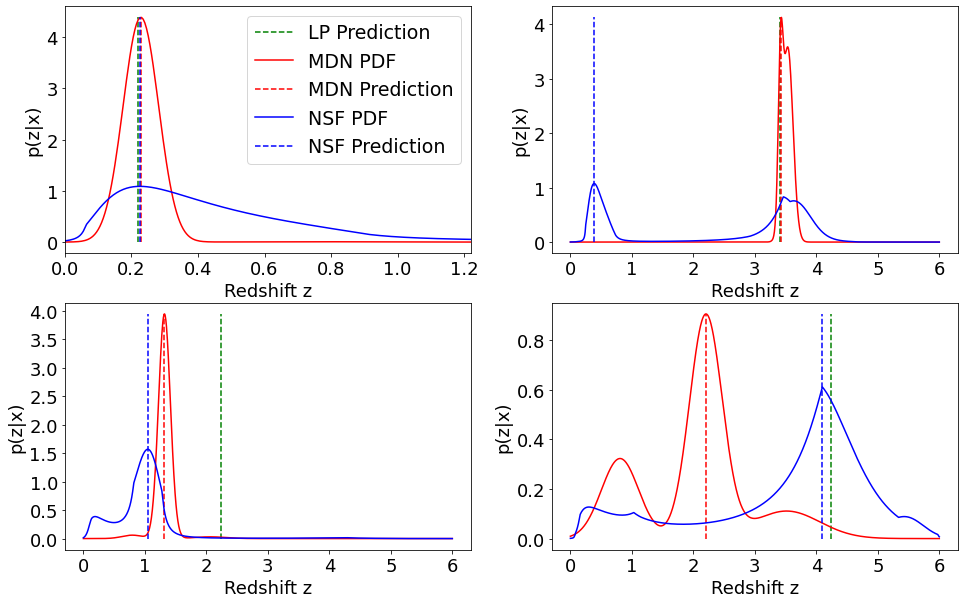

In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(16,10))



id=np.where(np.logical_and(lp_pred>0,lp_pred<1))[0][57]


h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[0,0].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[0,0],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[0,0],color='blue',label='NSF',h=h)

axs[0,0].set_xlim(np.max([0,lp_pred[id]-1]),np.min([6,lp_pred[id]+1]))

id=np.where(np.logical_and(lp_pred>2,lp_pred<3))[0][326]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[1,0].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[1,0],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[1,0],color='blue',label='NSF',h=h)

id=np.where(np.logical_and(lp_pred>3,lp_pred<4))[0][6]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])


axs[0,1].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[0,1],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[0,1],color='blue',label='NSF',h=h)


#axs[0,1].set_xlim(np.max([0,spec[id]-1]),np.min([6,spec[id]+1]))


id=np.where(np.logical_and(lp_pred>4,lp_pred<6))[0][0]

h=np.max([np.max(mdn_pdf[id,:]),np.max(nsf_pdf[id,:])])

axs[1,1].plot([lp_pred[id],lp_pred[id]],[0,h],color='green',label='LP Prediction',linestyle='--')
plot=plot_pdf(z_range,mdn_pdf[id,:],mdn_pred[id],ax=axs[1,1],color='red',label='MDN',h=h)
plot=plot_pdf(z_range,nsf_pdf[id,:],nsf_pred[id],ax=axs[1,1],color='blue',label='NSF',h=h)


axs[0,0].legend(fontsize=19)


for tick in axs[0,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[0,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[0,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[0,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

for tick in axs[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in axs[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 


axs[0,0].set_xlabel('Redshift z',fontsize=18)
axs[1,0].set_xlabel('Redshift z',fontsize=18)
axs[0,1].set_xlabel('Redshift z',fontsize=18)
axs[1,1].set_xlabel('Redshift z',fontsize=18)

axs[0,0].set_ylabel('p(z|x)',fontsize=18)
axs[1,0].set_ylabel('p(z|x)',fontsize=18)
axs[0,1].set_ylabel('p(z|x)',fontsize=18)
axs[1,1].set_ylabel('p(z|x)',fontsize=18)


plt.show()


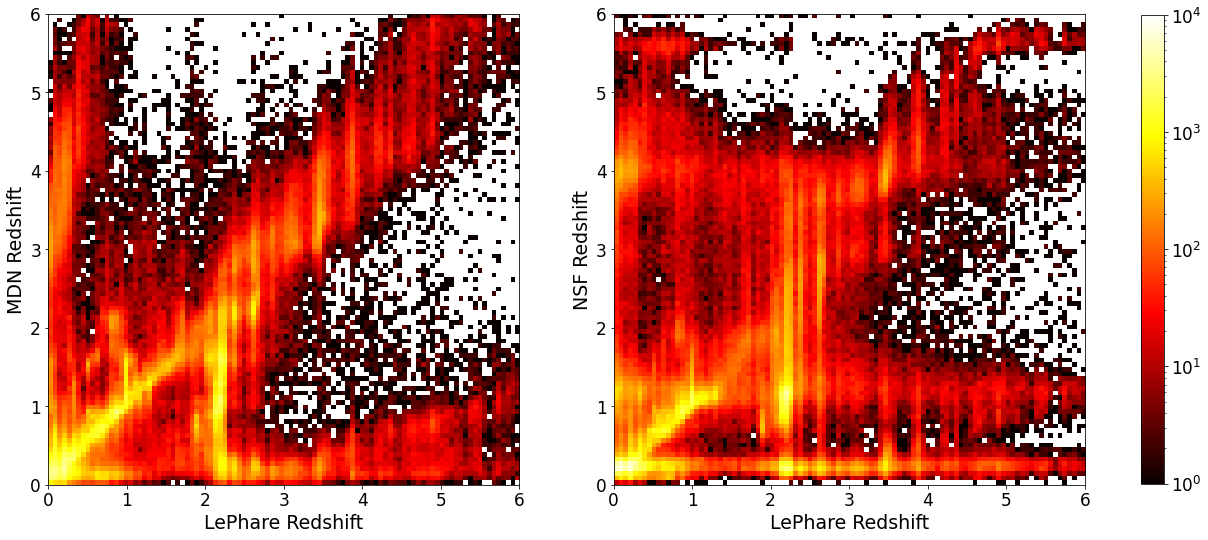

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gs

import copy

ncols=2
nrows=1

fig, axes = plt.subplots(nrows,ncols,figsize=(20,10))

data=[mdn_pred,nsf_pred]

##produce the actual data and compute the histograms
mappables=[]
for i in range(2):

    ##the 2d histogram from numpy
    H,xedges,yedges = np.histogram2d(lp_pred, data[i], bins=100, range=[[0, 6],[0,6]])

    mappables.append(H)

vmin = np.min(mappables)
vmax = np.max(mappables)

##second loop for visualisation
lab=['MDN','NSF']
c=0
for ax,H in zip(axes,mappables):

    x=copy.deepcopy(H)

    im = ax.imshow(x.T, extent=[0,6,6,0],cmap='hot',norm=mpl.colors.LogNorm(vmin=1, vmax=10000))
    ax.invert_yaxis()
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(17) 
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(17) 
    ax.set_xlabel("LePhare Redshift",fontsize=19)

    ax.set_ylabel(lab[c]+" Redshift",fontsize=19)
    c+=1

##colorbar using solution from linked question
cbar=fig.colorbar(im,ax=axes,fraction=0.021)
cbar.ax.tick_params(labelsize=17)
plt.show()

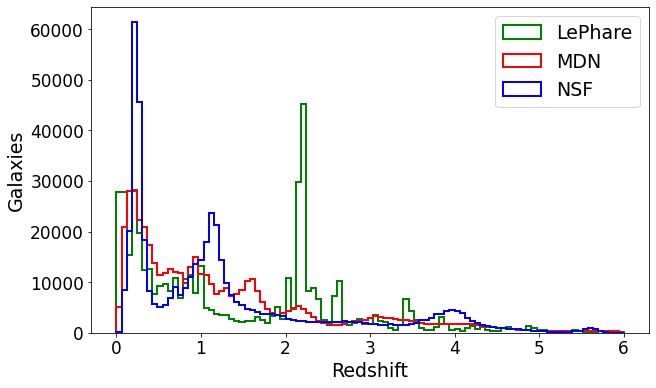

In [ ]:
plt.figure(figsize=(10,6))
bins=np.linspace(0,6,100)
plt.hist(lp_pred,bins=bins,histtype='step',label='LePhare',color='green',linewidth=2)
plt.hist(mdn_pred,bins=bins,histtype='step',label='MDN',color='red',linewidth=2)
plt.hist(nsf_pred,bins=bins,histtype='step',label='NSF',color='blue',linewidth=2)
plt.legend(fontsize=19)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Redshift',fontsize=19)
plt.ylabel('Galaxies',fontsize=19)
plt.show()
